# Learning PyMC3

## A quick start

In [1]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
from numpy.random import seed
seed(12345)
rc = {'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelsize': 10, 'font.size': 10, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [14, 6]}
sns.set(rc = rc)
sns.set_style("whitegrid")

In [2]:
with pm.Model() as model:
    
    # place priors on unknown model parameters
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.HalfNormal('sd', sd=1)
    
    # the likelihood of observations
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=np.random.randn(100))
    
    # sample from the posterior
    trace = pm.sample(1000, tune=500, njobs = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:04<00:00, 305.77it/s]


In [3]:
trace['mu'].shape

(4000,)

In [4]:
trace.nchains

4

In [5]:
trace.get_values('mu', chains=1).shape # get values of a single chain

(1000,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7287dda470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7284e6dac8>]], dtype=object)

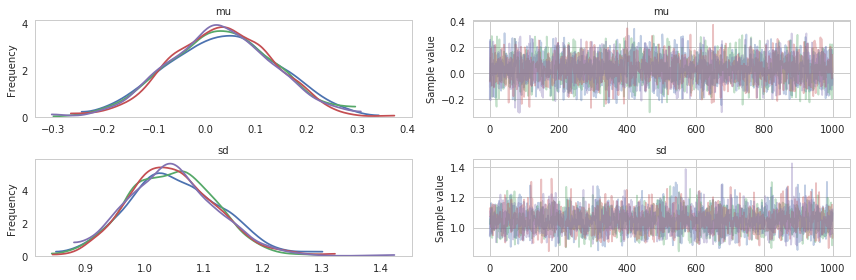

In [6]:
pm.traceplot(trace)

In [7]:
pm.gelman_rubin(trace)

{'mu': 0.99976015612039915, 'sd': 1.0004290607157877}

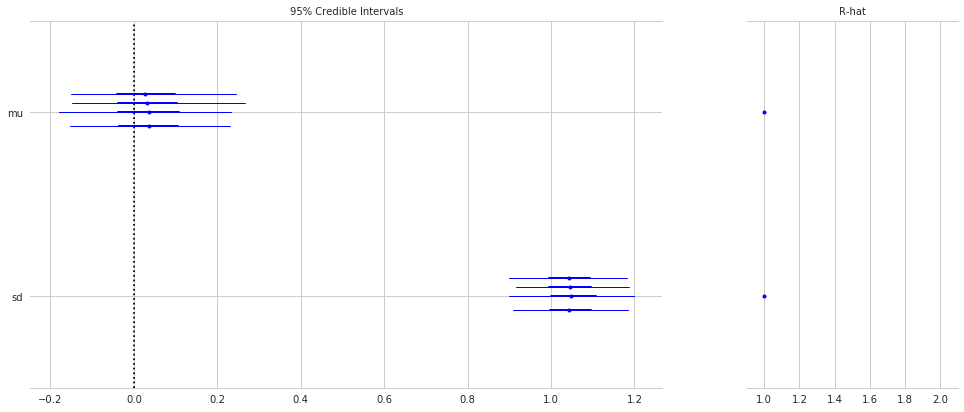

In [8]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7287fab4a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f729099cf98>], dtype=object)

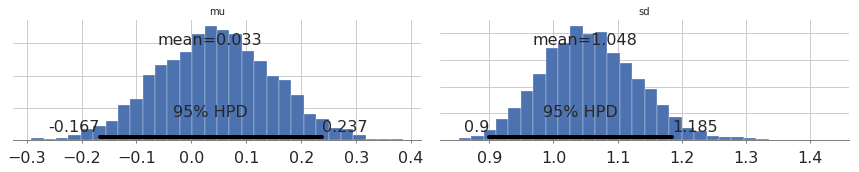

In [9]:
pm.plot_posterior(trace)

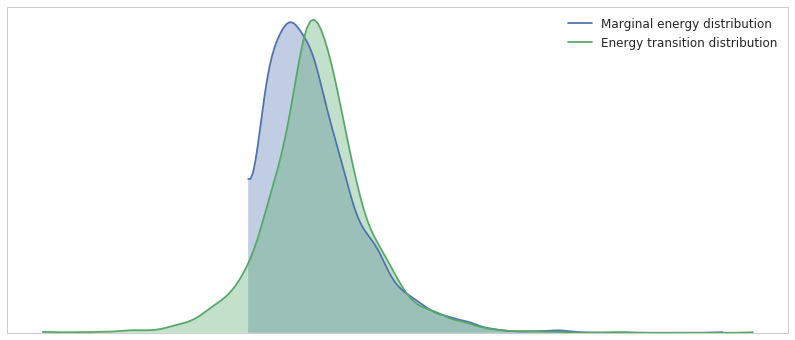

In [10]:
pm.energyplot(trace)

In [11]:
data = np.random.randn(100)
with model:
    post_pred = pm.sample_ppc(trace, samples=500, size=len(data))

100%|██████████| 500/500 [00:00<00:00, 2673.35it/s]


In [12]:
post_pred['obs'].shape

(500, 100)

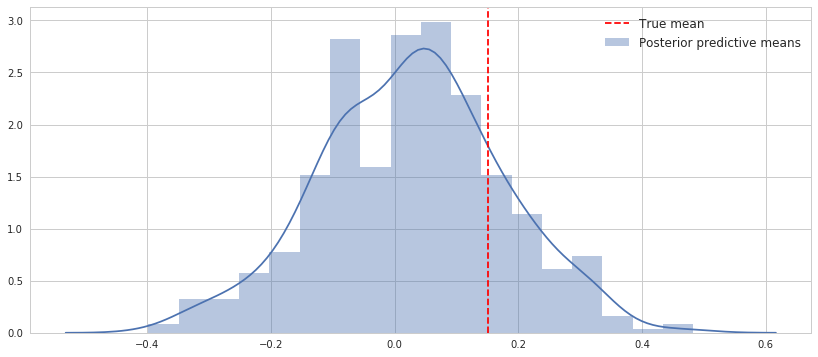

In [13]:
plt.figure()
ax = sns.distplot(post_pred['obs'].mean(axis=1), label='Posterior predictive means')
ax.axvline(data.mean(), color='r', ls='--', label='True mean')
ax.legend()